## 一、对音乐行业收入数信息表进行统计分析。参考教材P71-P73

## 二、对餐饮订单详情数据进行统计分析（要求：有适量注释；对结果进行分析；数据集为：meal_order_detail1.xls）：
1.查看餐饮数据的各个基本属性，从而初步了解你的数据。





In [2]:
import pandas as pd


excel_file = pd.ExcelFile(r"C:\Users\Administrator\Desktop\meal_order_detail1.xls")


sheet_names = excel_file.sheet_names
print(sheet_names)

df = excel_file.parse('Sheet1')

print('数据基本信息：')
df.info()

rows, columns = df.shape

if rows < 100 and columns < 20:

    print('数据全部内容信息：')
    print(df.to_csv(sep='\t', na_rep='nan'))
else:

    print('数据前几行内容信息：')
    print(df.head().to_csv(sep='\t', na_rep='nan'))

['Sheet1']
数据基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2779 entries, 0 to 2778
Data columns (total 19 columns):
detail_id            2779 non-null int64
order_id             2779 non-null int64
dishes_id            2779 non-null int64
logicprn_name        0 non-null float64
parent_class_name    0 non-null float64
dishes_name          2779 non-null object
itemis_add           2779 non-null int64
counts               2779 non-null int64
amounts              2779 non-null int64
cost                 0 non-null float64
place_order_time     2779 non-null object
discount_amt         0 non-null float64
discount_reason      0 non-null float64
kick_back            0 non-null float64
add_inprice          2779 non-null int64
add_info             0 non-null float64
bar_code             0 non-null float64
picture_file         2779 non-null object
emp_id               2779 non-null int64
dtypes: float64(8), int64(8), object(3)
memory usage: 412.6+ KB
数据前几行内容信息：
	detail_id	order_id	dishe

2.统计餐饮菜品销售状况，主要包括统计菜品的销量、菜品的平均售价、热销菜品等信息，并进行分析。

In [3]:

dish_sales_volume = df.groupby('dishes_name')['counts'].sum()


dish_avg_price = df.groupby('dishes_name')['amounts'].mean()

max_sales_volume = dish_sales_volume.max()
best_selling_dishes = dish_sales_volume[dish_sales_volume == max_sales_volume].index.tolist()


print('每个菜品的销量：')
print(dish_sales_volume)
print('\n每个菜品的平均售价：')
print(dish_avg_price)
print('\n热销菜品：')
print(best_selling_dishes)

每个菜品的销量：
dishes_name
 42度海之蓝             5
 北冰洋汽水             45
38度剑南春              6
50度古井贡酒             5
52度泸州老窖             8
53度茅台               5
一品香酥藕              11
三丝鳝鱼                2
三色凉拌手撕兔             6
不加一滴油的酸奶蛋糕          7
五彩藕苗               11
五彩豆                 6
五色糯米饭(七色)          59
五香酱驴肉              11
倒立蒸梭子蟹             19
党参黄芪炖牛尾             9
农夫山泉NFC果汁100%橙汁    22
冬瓜炒苦瓜               4
冰糖红豆薏米粥            24
冰镇花螺                1
凉拌海带豆芽紫菜            6
凉拌菠菜               77
凉拌萝卜丝              21
凉拌蒜蓉西兰花            34
剁椒鱼头               36
南瓜枸杞小饼干            16
南瓜芝士包              14
咖啡奶香面包              2
哈尔滨啤酒罐装            29
啤酒鸭                21
                   ..
超人气广式肠粉             3
路易拉菲红酒干红           13
辣炒海带丝              10
辣炒田螺               16
辣炒花蛤               12
辣炒鱿鱼               53
避风塘炒蟹              15
酸辣汤面                8
酸辣藕丁               21
重庆特色油烧兔             6
金玉良缘               21
铁板牛肉                2
长城窖酿解百纳红酒干红葡萄酒      4
露露无糖杏仁露    

3.统计用户情况（emp_id）,主要包括下单的会员数，频率最高会员id号，频率等信息。（注意此列数据类型需要转换为category）

In [4]:

df['emp_id'] = df['emp_id'].astype('category')


unique_members = df['emp_id'].nunique()

order_frequency = df['emp_id'].value_counts(normalize=True)

max_frequency = order_frequency.max()
most_frequent_members = order_frequency[order_frequency == max_frequency]

print('下单的会员数：', unique_members)
print('下单频率最高的会员 id 号及其频率：')
print(most_frequent_members)

下单的会员数： 228
下单频率最高的会员 id 号及其频率：
1122    0.016553
Name: emp_id, dtype: float64


4.删除全为空值或者所有元素取值相同的列。

In [6]:

df = df.dropna(axis=1, how='all')


df = df.loc[:, df.apply(pd.Series.nunique) != 1]


print('数据基本信息：')
df.info()


rows, columns = df.shape

if rows < 100 and columns < 20:
    print('数据全部内容信息：')
    print(df.to_csv(sep='\t', na_rep='nan'))
else:
  
    print('数据前几行内容信息：')
    print(df.head().to_csv(sep='\t', na_rep='nan'))

数据基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2779 entries, 0 to 2778
Data columns (total 9 columns):
detail_id           2779 non-null int64
order_id            2779 non-null int64
dishes_id           2779 non-null int64
dishes_name         2779 non-null object
counts              2779 non-null int64
amounts             2779 non-null int64
place_order_time    2779 non-null object
picture_file        2779 non-null object
emp_id              2779 non-null category
dtypes: category(1), int64(5), object(3)
memory usage: 191.0+ KB
数据前几行内容信息：
	detail_id	order_id	dishes_id	dishes_name	counts	amounts	place_order_time	picture_file	emp_id
0	2956	417	610062	蒜蓉生蚝	1	49	8/1/2016 11:05:00	caipu/104001.jpg	1442
1	2958	417	609957	蒙古烤羊腿	1	48	8/1/2016 11:07:00	caipu/202003.jpg	1442
2	2961	417	609950	大蒜苋菜	1	30	8/1/2016 11:07:00	caipu/303001.jpg	1442
3	2966	417	610038	芝麻烤紫菜	1	25	8/1/2016 11:11:00	caipu/105002.jpg	1442
4	2968	417	610003	蒜香包	1	13	8/1/2016 11:11:00	caipu/503002.jpg	1442



## 三、读取并查看P2P网络贷款数据主表的基本信息，完成以下任务


1.查看数据的各个基本属性，从而初步了解你的数据。(数据源:Training_Master.csv 主要存放了网贷用户的基本信息。)

In [8]:
import chardet

with open(r"C:\Users\Administrator\Desktop\Training_Master.csv", 'rb') as file:
    rawdata = file.read(100000)
    result = chardet.detect(rawdata)
    encoding = result['encoding']

print('检测到的文件编码为:', encoding)

检测到的文件编码为: GB2312


2.使用describe方法进行描述统计。并对结果进行分析（describe(include='object')分类数据统计，未设置为数值数据统计，设置为‘all’两种数据全部统计）

3.剔除值相同或全为空的列

In [9]:

numeric_description = df.describe()

categorical_description = df.describe(include='object')

all_description = df.describe(include='all')

print('数值数据描述性统计：')
print(numeric_description)
print('\n分类数据描述性统计：')
print(categorical_description)
print('\n所有数据描述性统计：')
print(all_description)

数值数据描述性统计：
         detail_id     order_id      dishes_id       counts      amounts
count  2779.000000  2779.000000    2779.000000  2779.000000  2779.000000
mean   4545.617128   737.658150  609981.577906     1.111191    45.337172
std    1710.910552   312.694193     153.691844     0.625428    36.808550
min     753.000000   137.000000  606057.000000     1.000000     1.000000
25%    3263.000000   471.000000  609951.500000     1.000000    25.000000
50%    4386.000000   669.000000  609980.000000     1.000000    35.000000
75%    5758.500000  1026.000000  610019.000000     1.000000    56.000000
max    8238.000000  1323.000000  610072.000000    10.000000   178.000000

分类数据描述性统计：
       dishes_name   place_order_time      picture_file
count         2779               2779              2779
unique         145               1407               142
top          白饭/大碗  8/6/2016 17:27:00  caipu/601005.jpg
freq            92                 13                92

所有数据描述性统计：
          detail_id     orde

In [13]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Administrator\Desktop\Training_Master.csv", encoding='GBK')


df = df.dropna(axis=1, how='all')

df = df.loc[:, df.apply(pd.Series.nunique) != 1]

csv_path = r"C:\Users\Administrator\Desktop\Training_Master_filtered.csv"
df.to_csv(csv_path)

## 四、对人口数据表进行统计描述分析。P92 操作题. 中国城市人口数据.csv

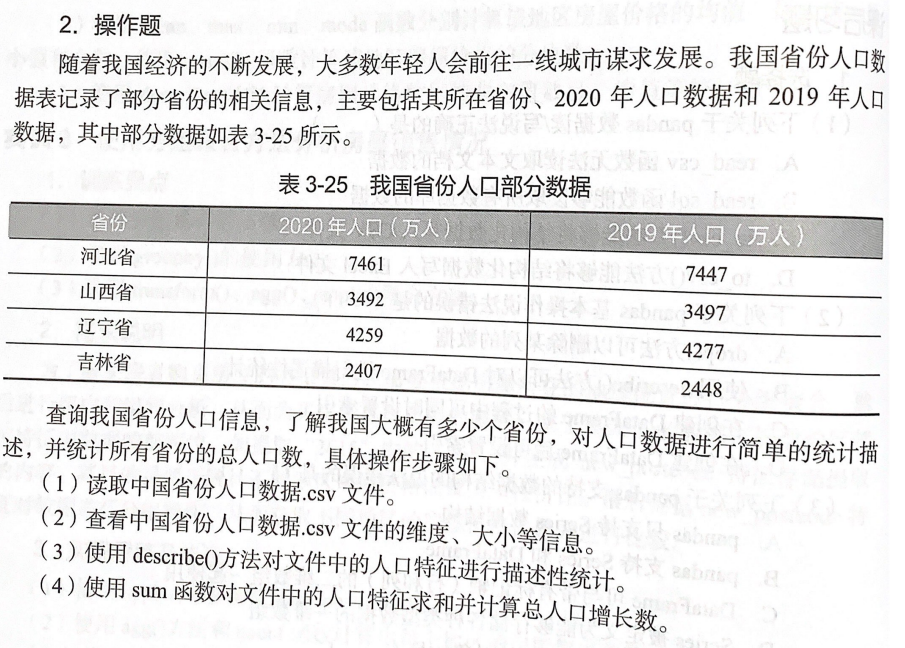

In [25]:

import pandas as pd

data = {
    "省份": ["河北省", "山西省", "辽宁省", "吉林省", "江苏省", "浙江省", "安徽省", "福建省", 
            "江西省", "山东省", "河南省", "湖北省", "湖南省", "广东省", "海南省", "四川省", 
            "贵州省", "云南省", "陕西省", "甘肃省", "青海省", "黑龙江省"],
    "2020年人口（万人）": [7461, 3492, 4259, 2407, 8475, 6457, 6103, 4154, 4519, 10153, 9937, 5775, 6644, 12601, 1008, 8367, 3856, 4721, 3953, 2502, 592, 3185],
    "2019年人口（万人）": [7447, 3497, 4277, 2448, 8469, 6375, 6092, 4137, 4516, 10106, 9901, 5927, 6640, 12489, 995, 8351, 3848, 4714, 3944, 2509, 590, 3255]
}

df_create = pd.DataFrame(data)
df_create.to_csv("中国城市人口数据.csv", index=False, encoding="utf-8")

print("CSV 文件创建成功！文件保存路径：C:\\Users\\Administrator\\中国城市人口数据.csv")
print("创建的数据预览：")
print(df_create.head())

CSV 文件创建成功！文件保存路径：C:\Users\Administrator\中国城市人口数据.csv
创建的数据预览：
   2019年人口（万人）  2020年人口（万人）   省份
0         7447         7461  河北省
1         3497         3492  山西省
2         4277         4259  辽宁省
3         2448         2407  吉林省
4         8469         8475  江苏省


In [27]:

import pandas as pd

population_data = {
    "省份": [
        "河北省", "山西省", "辽宁省", "吉林省", "江苏省", "浙江省", 
        "安徽省", "福建省", "江西省", "山东省", "河南省", "湖北省", 
        "湖南省", "广东省", "海南省", "四川省", "贵州省", "云南省", 
        "陕西省", "甘肃省", "青海省", "黑龙江省"
    ],
    "2020年人口（万人）": [
        7461, 3492, 4259, 2407, 8475, 6457, 6103, 4154, 4519, 10153, 
        9937, 5775, 6644, 12601, 1008, 8367, 3856, 4721, 3953, 2502, 592, 3185
    ],
    "2019年人口（万人）": [
        7447, 3497, 4277, 2448, 8469, 6375, 6092, 4137, 4516, 10106, 
        9901, 5927, 6640, 12489, 995, 8351, 3848, 4714, 3944, 2509, 590, 3255
    ]
}

df = pd.DataFrame(population_data)
print("=== 数据创建成功！等同于读取CSV文件 ===")
print("数据预览（前5行）：")
print(df.head(), "\n")

print("=== 1. 数据基础信息 ===")
print(f"数据维度（行数×列数）：{df.shape}")  
print(f"总数据量（单元格总数）：{df.size}") 
print("\n数据类型与非空值情况：")
print(df.info())

print("\n=== 2. 人口数据描述性统计（单位：万人）===")

desc_stats = df[["2020年人口（万人）", "2019年人口（万人）"]].describe()
print(desc_stats.round(2)) 

print("\n=== 3. 总人口及增长数统计 ===")
total_2020 = df["2020年人口（万人）"].sum()
total_2019 = df["2019年人口（万人）"].sum() 
population_growth = total_2020 - total_2019 

print(f"2020年22个省份总人口：{total_2020:.0f} 万人")
print(f"2019年22个省份总人口：{total_2019:.0f} 万人")
print(f"2019-2020年22个省份总人口增长数：{population_growth:.0f} 万人")

=== 数据创建成功！等同于读取CSV文件 ===
数据预览（前5行）：
   2019年人口（万人）  2020年人口（万人）   省份
0         7447         7461  河北省
1         3497         3492  山西省
2         4277         4259  辽宁省
3         2448         2407  吉林省
4         8469         8475  江苏省 

=== 1. 数据基础信息 ===
数据维度（行数×列数）：(22, 3)
总数据量（单元格总数）：66

数据类型与非空值情况：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
2019年人口（万人）    22 non-null int64
2020年人口（万人）    22 non-null int64
省份             22 non-null object
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes
None

=== 2. 人口数据描述性统计（单位：万人）===
       2020年人口（万人）  2019年人口（万人）
count        22.00        22.00
mean       5482.77      5478.50
std        3067.22      3043.79
min         592.00       590.00
25%        3583.00      3584.75
50%        4620.00      4615.00
75%        7256.75      7245.25
max       12601.00     12489.00

=== 3. 总人口及增长数统计 ===
2020年22个省份总人口：120621 万人
2019年22个省份总人口：120527 万人
2019-2020年22个省份总人口增长数：94 万人
